# Assignment 2 - Part A: Exploring data

We import the necessary modules.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import math

Now we load the data set, from the comma-separated training file, storing it as a list of records, where each record is represented with a dict.

In [23]:
ATTRS_ALL = ["LOCATION", "W", "FINAL_MARGIN", "SHOT_NUMBER", "PERIOD", "GAME_CLOCK", "SHOT_CLOCK", "DRIBBLES", "TOUCH_TIME", "SHOT_DIST", "PTS_TYPE", "CLOSE_DEF_DIST", "Target"]
ATTRS_CATEGORICAL = ["LOCATION", "W", "PERIOD", "PTS_TYPE", "Target"]

def load_basketball_data(filename):
    records = []
    with open(filename, 'rt') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if len(row) == len(ATTRS_ALL):  # 13 attributes, including the target
                d = {}
                for i, attr in enumerate(ATTRS_ALL):
                    d[attr] = row[i] if attr in ATTRS_CATEGORICAL else float(row[i])
                records.append(d)
    return records

basketball_data = load_basketball_data("data/basketball.train.csv")

## Summary statistics and boxplots

Choose 3 numeric attributes and complete the table with the summary statistics.

| Attribute | Mean | Median | Range | Variance | AAD | MAD | IQR |
| --- | --- | --- | --- | --- | --- | --- | --- |
| SHOT_NUMBER | 6.36 | 5.0 | 35.0 | 20.56 | 2.66*10^-14 | -1.36 | 6.0 |
| SHOT_DIST | 12.23 | 12.8 | 43.3 | 77.12 | -1.32*10^-13 | -0.43 | 17.8 |
| GAME_CLOCK | 361.29 | 363.0 | 719.0 | 40773.27 | 1.49*10^-14 | 1.71 | 348.0 |

In [24]:
NUMERIC_ATTRS = ["SHOT_NUMBER", "SHOT_DIST", "GAME_CLOCK"]

def mean(attr):
    return sum(x[attr] for x in basketball_data[0:len(basketball_data)]) / len(basketball_data)

def median(attr):
    values = sorted([x[attr] for x in basketball_data[0:len(basketball_data)]])
    return (values[int(len(values) / 2)] if len(values) % 2 != 0 else (values[int(len(values) / 2)] + values[int(len(values) / 2) - 1]) / 2)

def calc_range(attr):
    values = [x[attr] for x in basketball_data[0:len(basketball_data)]]
    return max(values) - min(values)

def variance(attr):
    values_mean = mean(attr)
    return sum([math.pow(x[attr] - values_mean, 2) for x in basketball_data]) / (len(basketball_data) - 1) if len(basketball_data) > 1 else 0

def aad(attr):
    values = [x[attr] for x in basketball_data[0:len(basketball_data)]]
    means = mean(attr)
    return sum(value - means for value in values) / len(values)

def mad(attr):
    dmean = mean(attr)
    ad = sorted([(value[attr] - dmean) for value in basketball_data[0:len(basketball_data)]])
    return (ad[int(len(ad) / 2)] if len(ad) % 2 != 0 else (ad[int(len(ad) / 2)] + ad[int(len(ad) / 2) - 1]) / 2)

def iqr(attr):
    values = [x[attr] for x in basketball_data[0:len(basketball_data)]]
    q75, q25 = np.percentile(values, [75, 25])
    return q75 - q25

def entropy(records):
    made = sum([1 for shot in records if shot["Target"] == "made"])
    missed = sum([1 for shot in records if shot["Target"] == "missed"])
    entropy = -(missed / (made + missed) * math.log2(missed / (made + missed))) - (made / (made + missed) * math.log2(made / (made + missed)))
    return entropy


means = [mean(attr) for attr in NUMERIC_ATTRS]

medians = [median(attr) for attr in NUMERIC_ATTRS]

ranges = [calc_range(attr) for attr in NUMERIC_ATTRS]

variances = [variance(attr) for attr in NUMERIC_ATTRS]

aads = [aad(attr) for attr in NUMERIC_ATTRS]

mads = [mad(attr) for attr in NUMERIC_ATTRS]

iqrs = [iqr(attr) for attr in NUMERIC_ATTRS]
print("Attrs: SHOT_NUMBER | SHOT_DIST | GAME_CLOCK\nMeans: {}\nMedians: {}\nRanges {}\nVariances {}\nAAD: {}\nMAD: {}\nIQR: {}".format(means, medians, ranges, variances, aads, mads, iqrs))

Attrs: SHOT_NUMBER | SHOT_DIST | GAME_CLOCK
Means: [6.3614409175349325, 13.229161618609286, 361.2897988853889]
Medians: [5.0, 12.8, 363.0]
Ranges [35.0, 43.3, 719.0]
Variances [20.55555376407199, 77.12335487899057, 40773.270609269144]
AAD: [2.6649417699674276e-14, -1.317063883998414e-13, 1.4942765575126658e-14]
MAD: [-1.3614409175349325, -0.42916161860928526, 1.7102011146110954]
IQR: [6.0, 17.800000000000001, 348.0]


For one of those 3 attributes, plot in a single figure 2 boxplots, one per each of the 2 classes.

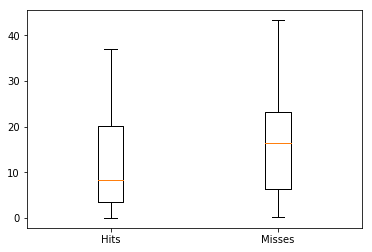

In [25]:
# Classes = Hit | Miss
# The attribute with the highest information gain is SHOT_DIST so I will plot class against this attribute
attr = "SHOT_DIST"
hits = [float(shot[attr]) for shot in basketball_data if shot['Target'] == 'made']
misses = [float(shot[attr]) for shot in basketball_data if shot['Target'] == 'missed']

plt.clf()
plt.boxplot([hits, misses], labels=["Hits", "Misses"])
plt.show()

## Binarization, histograms and scatter plots

You can easily know which are all the possible values of an attribute by converting into a set its list of values.

Choose 2 categorical attributes (different from the target) and plot each distribution in a histogram.

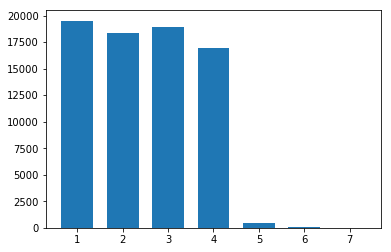

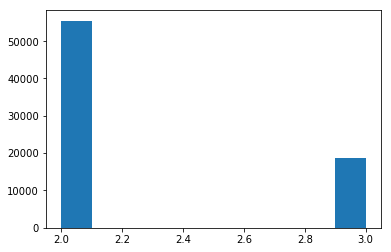

In [26]:
# PTS_TYPE & PERIOD
pts = [int(pts['PTS_TYPE']) for pts in basketball_data]
period = [int(period['PERIOD']) for period in basketball_data]


plt.clf()
bins = range(1, 9)
plt.hist(period, bins=bins, rwidth=0.7)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins)
plt.show()


plt.hist(pts)
plt.show()

Binarize all the categorical attributes (different from the target) to obtain a dataset where each record is a list of zeros and non-zero values.

In [27]:
def binarize(data):
    binarized_data = {}
    
    # Wins [1, 0] | Losses [0, 1]
    binarized_data['W'] = [[1, 0] if game['W'] == 'W' else [0, 1] for game in data]
    # Home [1, 0] | Away [0, 1]
    binarized_data['LOCATION'] = [[1, 0] if game['LOCATION'] == 'H' else [0, 1] for game in data]
    
    # There are a maximum of 7 periods, where the 7th only occurs a small amount of times
    period = [0, 0, 0, 0, 0, 0, 0]
    # PTS_TYPE = 1 -> [1, 0, 0], 2 -> [0, 1, 0], 3 -> [0, 0, 1]
    point = [0, 0, 0]
    
    periods = []
    points = []
    
    for game in data:
        temp_pts = list(point)
        temp_pts[int(game['PTS_TYPE']) - 1] = 1
        points.append(temp_pts)
        temp_period = list(period)
        temp_period[int(game['PERIOD']) - 1] = 1
        periods.append(temp_period)
    binarized_data['PTS_TYPE'] = points
    binarized_data['PERIOD'] = periods
    
    # Returns a dict containing a list of all the binarized data for every categorical attribute
    # Ex. binarized_data['PERIOD'] -> list of binarized data of all periods
    return binarized_data
    
    

bin_data = binarize(basketball_data)
for attribute in bin_data:
    print('Binarized data of {0} contains {1} elements'.format(attribute, len(bin_data[attribute])))
    print('Example from {}: {}'.format(attribute, bin_data[attribute][1000]))

Binarized data of PERIOD contains 74286 elements
Example from PERIOD: [0, 0, 0, 1, 0, 0, 0]
Binarized data of W contains 74286 elements
Example from W: [1, 0]
Binarized data of PTS_TYPE contains 74286 elements
Example from PTS_TYPE: [0, 0, 1]
Binarized data of LOCATION contains 74286 elements
Example from LOCATION: [0, 1]


Choose 2 numeric attributes and compare them in a scatter plot, with different colors per each class.

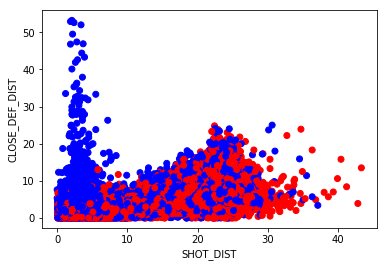

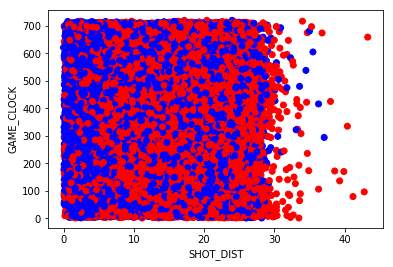

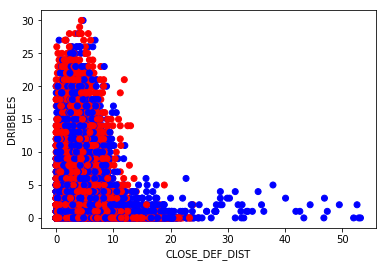

In [28]:
def scatter(data, attributes):
    scatter1 = [float(point[attributes[0]]) for point in data]
    scatter2 = [float(point[attributes[1]]) for point in data]
    colors = ['blue' if point['Target'] == 'made' else 'red' for point in data]
    plt.clf()  
    plt.xlabel(attributes[0])
    plt.ylabel(attributes[1])
    plt.scatter(scatter1, scatter2, color=colors)
    plt.show()

# Showing scatter plots of some attributes
# Can only call using 2 attributes and those have to be numeric

# First plot shows a clear relationship between shot distance and closest defender
scatter(basketball_data, ['SHOT_DIST', 'CLOSE_DEF_DIST'])
# As expected, there is little information to gather from the relationship between shot distance and game clock 
scatter(basketball_data, ['SHOT_DIST', 'GAME_CLOCK'])
# Some information to gather from this last plot
scatter(basketball_data, ['CLOSE_DEF_DIST', 'DRIBBLES'])